In [1]:
import os
import polars as pl
import matplotlib.pyplot as plt
# Utility import
import rfa_utils.general_fns as gf
# EDA import
import rfa_eda.remittance_eda as reda

In [2]:
# List of Excel sheet names and dict key IDs
names = ['country-lookup', 'cost-to-country', 'cost-from-country', 'inflows' , 'outflows']
ids = ['lookup', 'cost_to', 'cost_from', 'inflow', 'outflow']

In [3]:
# Import Excel file
remit = gf.import_excel(
    'data/remittance/remittance-data.xlsx',
    names
)
# Rename dataframes
for new, old in zip(ids, list(remit.keys())):
    remit[new] = remit.pop(old)
# Convert to pandas
for df in remit:
    remit[df] = remit[df].to_pandas()

In [4]:
# Merge lookup to cost to/from country dataframes
cost_to_merged = reda.merge_lookup(remit["cost_to"], remit["lookup"])
cost_from_merged = reda.merge_lookup(remit["cost_from"], remit["lookup"])

# Pivot tables for average cost to country
avg_cost_to_income = reda.pivot_table(cost_to_merged, "Income")
avg_cost_to_region = reda.pivot_table(cost_to_merged, "Region")

# Pivot tables for average cost from country
avg_cost_from_income = reda.pivot_table(cost_from_merged, "Income")
avg_cost_from_region = reda.pivot_table(cost_from_merged, "Region")

In [5]:
# Summary stats for cost to country by Income and Region from 2011-2020
print('>>> Cost to Country Summary Stats')
reda.summary_stats(avg_cost_to_income)
reda.summary_stats(avg_cost_to_region)

# Summary stats for cost from country by Income and Region from 2011-2020
print('\n>>> Cost from Country Summary Stats')
reda.summary_stats(avg_cost_from_income)
reda.summary_stats(avg_cost_from_region)

>>> Cost to Country Summary Stats
╒═══════╤═══════════════╤══════════════╤═══════════════════════╤═══════════════════════╕
│       │   High income │   Low income │   Lower middle income │   Upper middle income │
╞═══════╪═══════════════╪══════════════╪═══════════════════════╪═══════════════════════╡
│ count │        10.000 │       10.000 │                10.000 │                10.000 │
├───────┼───────────────┼──────────────┼───────────────────────┼───────────────────────┤
│ mean  │         6.005 │       10.131 │                 8.174 │                 7.268 │
├───────┼───────────────┼──────────────┼───────────────────────┼───────────────────────┤
│ std   │         1.042 │        1.320 │                 0.494 │                 0.363 │
├───────┼───────────────┼──────────────┼───────────────────────┼───────────────────────┤
│ min   │         4.718 │        8.943 │                 7.439 │                 6.661 │
├───────┼───────────────┼──────────────┼───────────────────────┼────────────

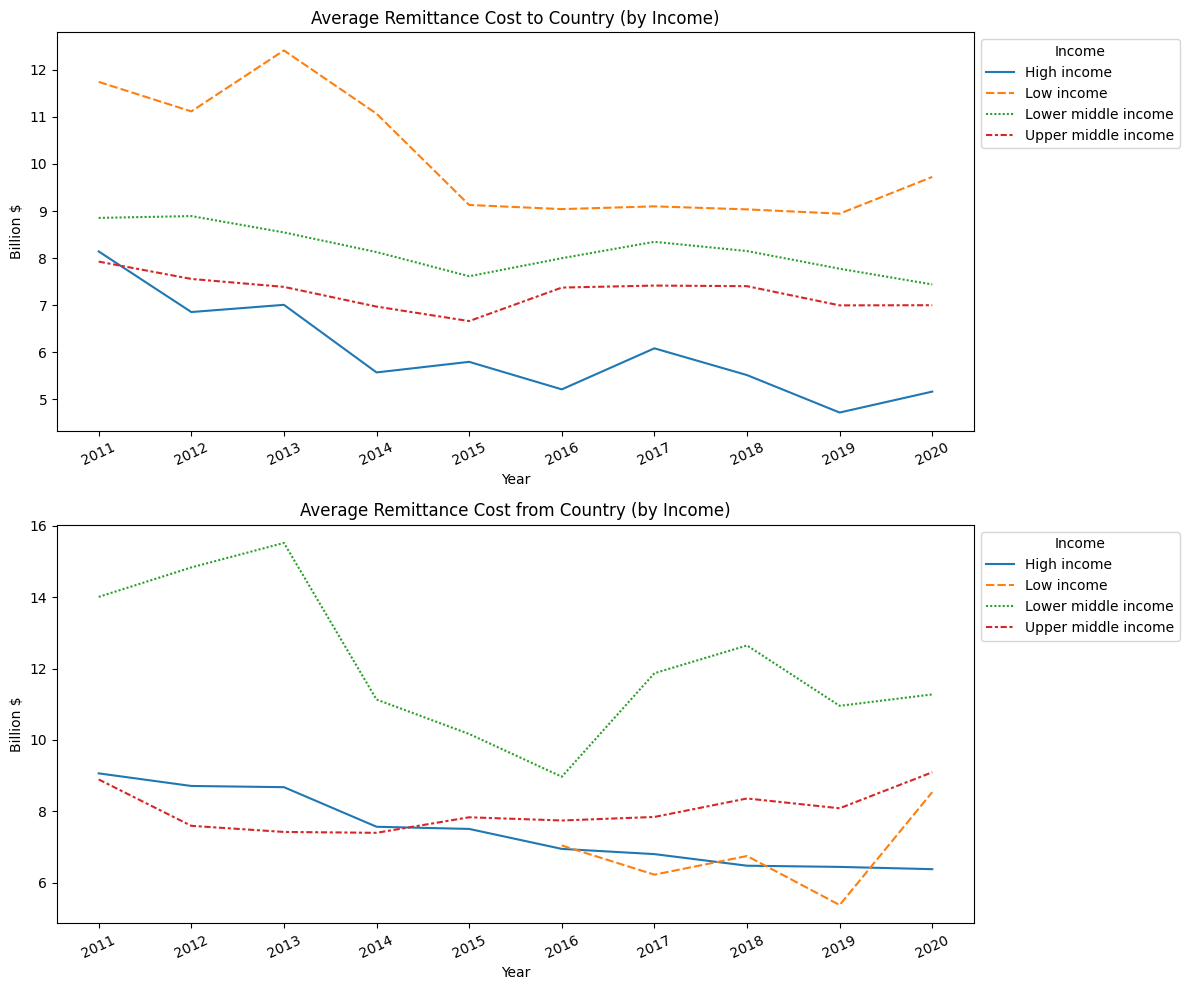

In [6]:
# Create a figure with two axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the cost to/from country by Income
reda.plot_lineplot(avg_cost_to_income, "Cost to Country (by Income)", ax1)
reda.plot_lineplot(avg_cost_from_income, "Cost from Country (by Income)", ax2)
plt.tight_layout()
plt.show()

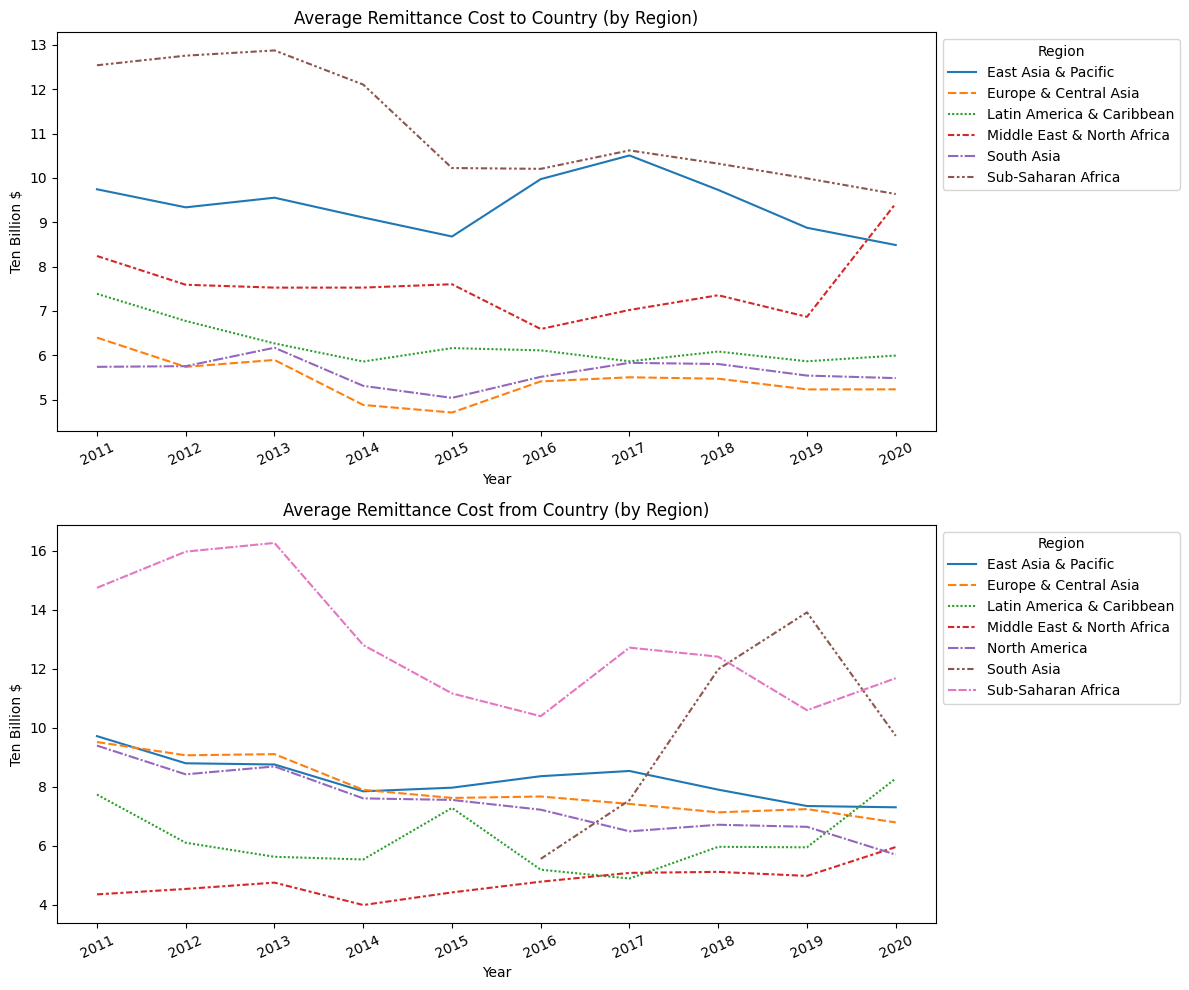

In [7]:
# Create a figure with two axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the cost to/from country by Region
reda.plot_lineplot(avg_cost_to_region, "Cost to Country (by Region)", ax1)
reda.plot_lineplot(avg_cost_from_region, "Cost from Country (by Region)", ax2)
plt.tight_layout()
plt.show()

In [8]:
# Merge lookup to remittance flow dataframes
inflow_merged = reda.merge_lookup(remit["inflow"], remit["lookup"])
outflow_merged = reda.merge_lookup(remit["outflow"], remit["lookup"])

# Create pivot tables for average inflow
avg_inflow_income = reda.pivot_table(inflow_merged, "Income")
avg_inflow_region = reda.pivot_table(inflow_merged, "Region")

# Create pivot tables for average outflow
avg_outflow_income = reda.pivot_table(outflow_merged, "Income")
avg_outflow_region = reda.pivot_table(outflow_merged, "Region")

In [9]:
# Summary stats for remittance inflow by Income and Region from 2000-2022
print('>>> Remittance Inflow Summary Stats')
reda.summary_stats(avg_inflow_income)
reda.summary_stats(avg_inflow_region)

# Summary stats for remittance outflow by Income and Region from 2000-2022
print('\n>>> Remittance Outflow Summary Stats')
reda.summary_stats(avg_outflow_income)
reda.summary_stats(avg_outflow_region)

>>> Remittance Inflow Summary Stats
╒═══════╤════════════════╤═══════════════╤═══════════════════════╤═══════════════════════╕
│       │    High income │    Low income │   Lower middle income │   Upper middle income │
╞═══════╪════════════════╪═══════════════╪═══════════════════════╪═══════════════════════╡
│ count │         23.000 │        23.000 │                23.000 │                23.000 │
├───────┼────────────────┼───────────────┼───────────────────────┼───────────────────────┤
│ mean  │ 2302057788.166 │ 417388077.280 │        4081858617.069 │        2719325349.710 │
├───────┼────────────────┼───────────────┼───────────────────────┼───────────────────────┤
│ std   │  645174742.000 │ 207577703.119 │        2009705386.321 │        1156187415.346 │
├───────┼────────────────┼───────────────┼───────────────────────┼───────────────────────┤
│ min   │ 1040293335.602 │ 104815686.612 │        1078228556.651 │         739545102.959 │
├───────┼────────────────┼───────────────┼────────────

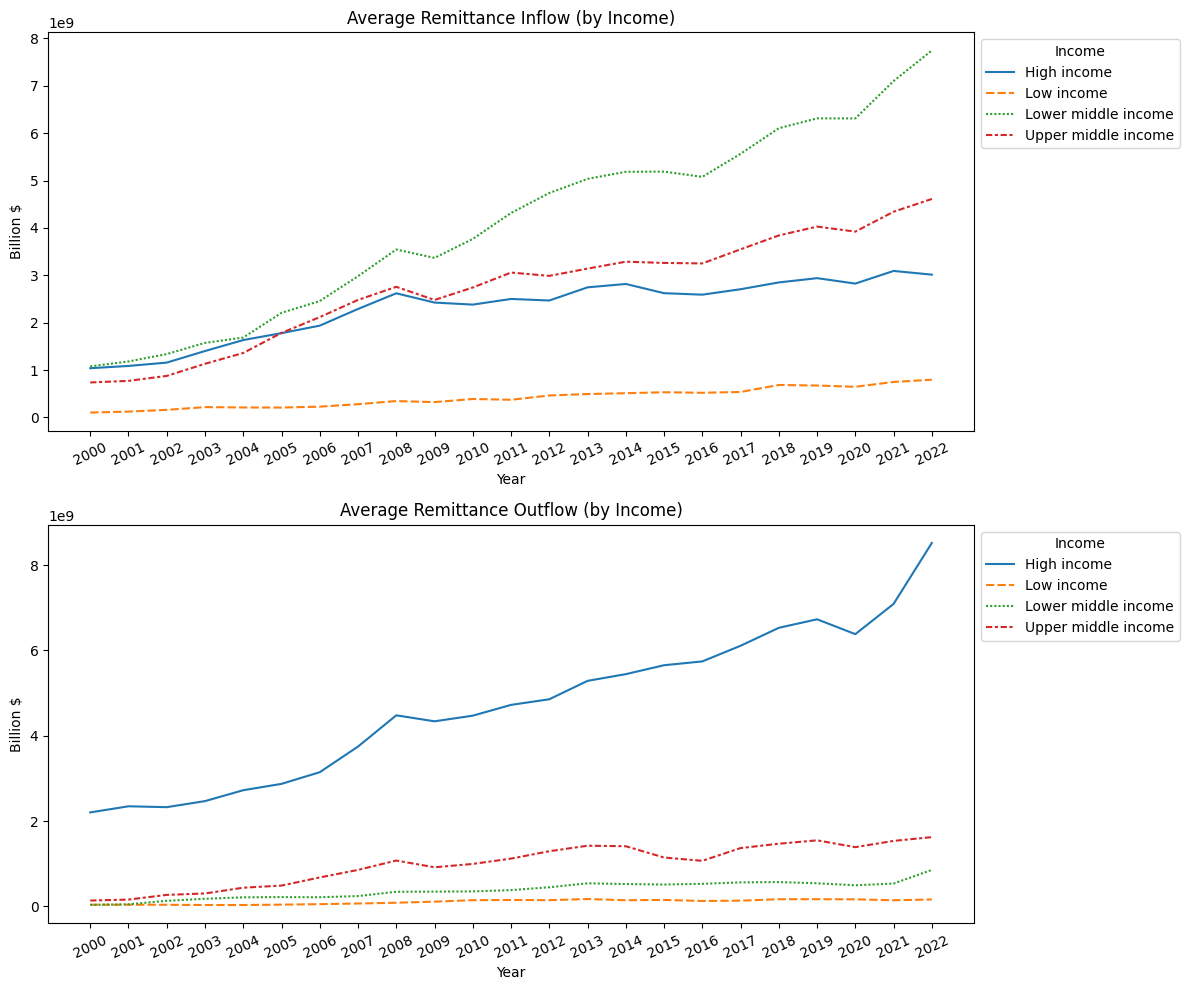

In [10]:
# Create a figure with two axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the remittance inflow/outflow by Income
reda.plot_lineplot(avg_inflow_income, "Inflow (by Income)", ax1)
reda.plot_lineplot(avg_outflow_income, "Outflow (by Income)", ax2)
plt.tight_layout()
plt.show()

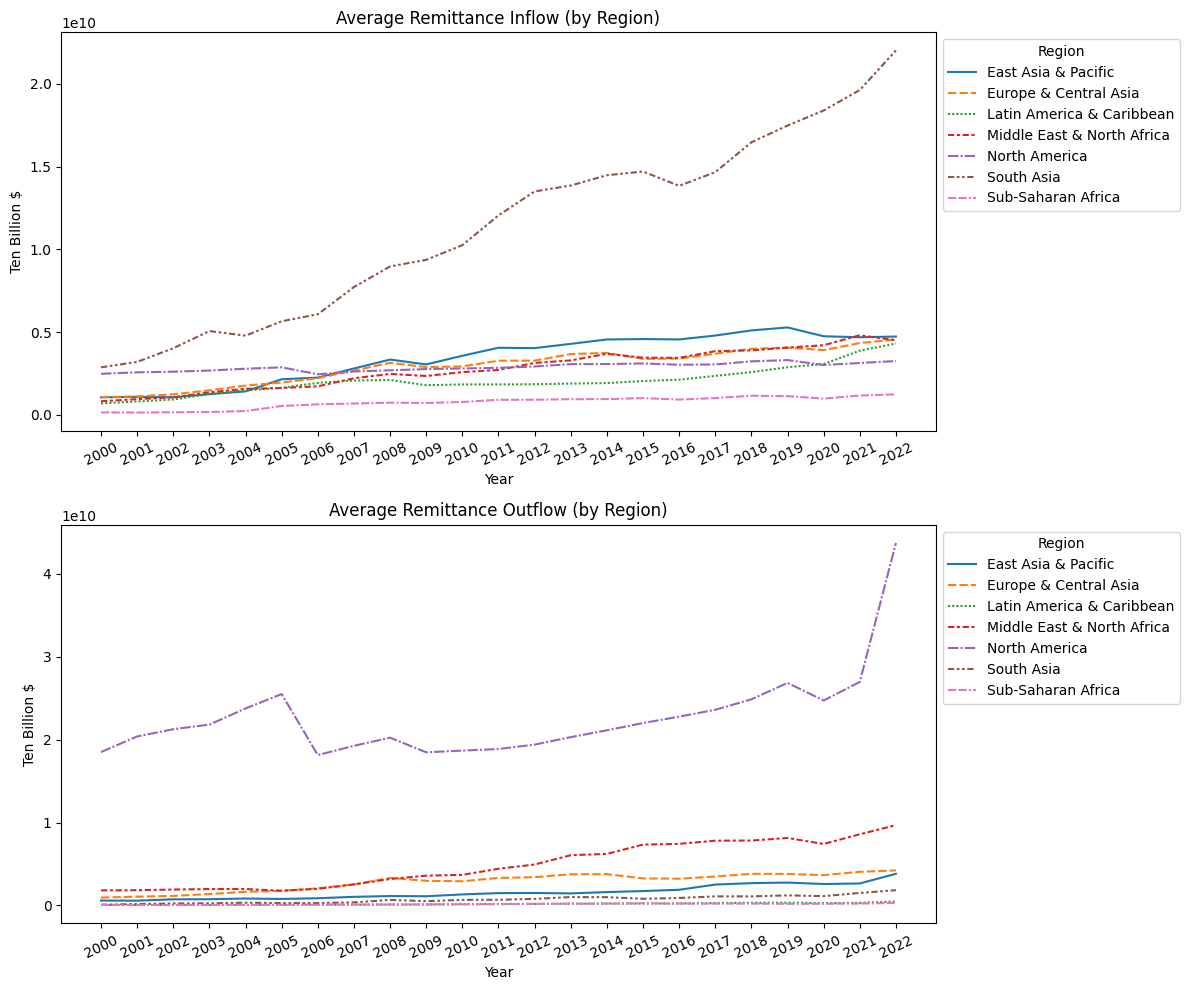

In [11]:
# Create a figure with two axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the remittance inflow/outflow by Region
reda.plot_lineplot(avg_inflow_region, "Inflow (by Region)", ax1)
reda.plot_lineplot(avg_outflow_region, "Outflow (by Region)", ax2)
plt.tight_layout()
plt.show()

In [12]:
# Dict of remittance pivot tables
remittance_tables = {
    'cost_to_income': avg_cost_to_income,
    'cost_to_region': avg_cost_to_region,
    'cost_from_income': avg_cost_from_income,
    'cost_from_region': avg_cost_from_region,
    'inflow_income': avg_inflow_income,
    'inflow_region': avg_inflow_region,
    'outflow_income': avg_outflow_income,
    'outflow_region': avg_outflow_region,
}
# Check and create tables file
tables_path = os.path.join('data/remittance/', 'remittance-tables.xlsx')
if not os.path.exists(tables_path):
    for table in remittance_tables:
        # Convert pandas to Polars
        remittance_tables[table] = remittance_tables[table].rename_axis('year')
        remittance_tables[table] = pl.from_pandas(remittance_tables[table].reset_index())
    gf.create_excel(tables_path, remittance_tables)